In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.utils import to_categorical

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


## Dataset (MNIST Flattened CSV)

In [2]:
mnist = pd.read_csv("mnist.csv")

# Flattened MNIST Images.

data = np.array(mnist)

X = data[:,:-1]

y = data[:,-1]
y_oht = to_categorical(y,num_classes=10, dtype='int32')

X_train, X_test, y_train, y_test = train_test_split(X, y_oht, test_size=0.2, random_state=5)

## Objective:
        
        We need to classify the given flattened grayscale images into the 10 digits of Decimal system

## Neural Network 

In [3]:
def softmax(a):
    ea = np.exp(a)
    return ea/np.sum(ea,axis=1,keepdims=True)

# Dimensionality needs to be maintained.


class NeuralNetwork:
    
    # Constructing 3 layer acrchitecture with softmax as output activation.
    
    def __init__(self,input_size,h1,h2,output_size):    # h1 -> number of neurons in first layer
                                                        # h2 -> number of neurons in second layer
        model = {}
        model["W1"] = np.random.randn(input_size,h1)    # Weight Matrix for first layer
        model["b1"] = np.zeros((1,h1))                  # Bias for first layer

        model["W2"] = np.random.randn(h1,h2)              # Weight Matrix for second layer
        model["b2"] = np.zeros((1,h2))                    # Bias for second layer

        model["W3"] = np.random.randn(h2,output_size)     # Weight Matrix for third layer 
        model["b3"] = np.zeros((1,output_size))           # Bias for third layer
        
        self.activation_outputs = (-1,-1,-1)            # Activation outputs after each layer

        self.model = model

        
        
#   Forward Propogation ...        
        
    def forward(self,X):
        
        model = self.model
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]

        # First Layer
        z1 = np.dot(X,W1) + b1
        a1 = np.tanh(z1)          # tanh activation

        #Second Layer
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)          # tanh activation

        #Third Layer
        z3 = np.dot(a2,W3) + b3
        a3 = softmax(z3)          # Softmax Activation


        self.activation_outputs = (a1,a2,a3)
        return a3                 # Final Output is from softmax activation
    
    
    
#   Back Propogation...
    
    def backward(self,X,y,learning_rate):

        m = X.shape[0]
        model = self.model
        (a1,a2,a3) = self.activation_outputs 
        W1,W2,W3 = model["W1"],model["W2"],model["W3"]
        b1,b2,b3 = model["b1"],model["b2"],model["b3"]
        
        # Delta3,dw3,db3
        delta3 = a3 - y               # for cross entropy, softmax activation
        dw3 = np.dot(a2.T,delta3)     # (h2Xm,mXc) = (h2Xc) = W3.shape
        db3 = np.sum(delta3,axis=0)   

        # Delta2, dw2, db2
        delta2 = np.dot(delta3,W3.T)*(1-np.square(a2))
        dw2 = np.dot(a1.T,delta2) # (h1Xm,mXh2) = (h1Xh2) = W2.shape
        db2 = np.sum(delta2,axis=0)

        # Delta1, dw1, db1
        delta1 = np.dot(delta2,W2.T)*(1-np.square(a1))
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)

        #Gradient Descent
        
        self.model["W1"] -= learning_rate*dw1
        self.model["W2"] -= learning_rate*dw2
        self.model["W3"] -= learning_rate*dw3

        self.model["b1"] -= learning_rate*db1
        self.model["b2"] -= learning_rate*db2
        self.model["b3"] -= learning_rate*db3
        
        
        

    def predict(self,X):
        
        y_pred = self.forward(X)           # Prediction is just the forward pass for X_test
        return np.argmax(y_pred,axis=1)    # Prediction for the output with max probability 


    def loss(self,y_oht,pred):              
        return -1*np.mean(y_oht*np.log(pred))   # Implementing Cross-Entropy Loss
    
    
    
    def train(self,X,y,learning_rate,epochs):

        losses = []
        for i in range(epochs):  
                                                    
            preds = self.forward(X)                 # For every epoch, a forward pass followed by back propogation is done,
                                                    # loss is calculated and weights are updated after every epoch. 
            l = self.loss(y,preds)                  # Training time can be decreased using mini-Batch gradient descent.
            losses.append(l)
            
            self.backward(X,y,learning_rate)

        
        return losses

In [5]:
NN = NeuralNetwork(784,22,15,10)
losses = NN.train(X,y_oht,0.00001,1100)  # learning rate=0.00001 to avoid oershooting of the global minima

#  Caution !! -> Takes about 1 minute to train on the examples

## Loss Plot

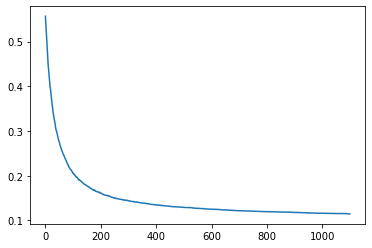

In [6]:
plt.plot(losses)       # Losses Minimised
plt.show()

## Prediction

In [7]:
y_pred = NN.predict(X_test)

score = 0

for i in range(y_test.shape[0]) :
    if(y_pred[i]==np.argmax(y_test[i],axis=0)):
        score += 1
        
accuracy = score/y_test.shape[0]

In [8]:
accuracy    # 62% accuracy

0.622

## 62% Accurate on testing data